In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [36]:
df = pd.read_csv("Reviews.csv")

df =df.head(2000)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [37]:
df.shape

(2000, 10)

In [38]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      2000 non-null   int64 
 1   ProductId               2000 non-null   object
 2   UserId                  2000 non-null   object
 3   ProfileName             2000 non-null   object
 4   HelpfulnessNumerator    2000 non-null   int64 
 5   HelpfulnessDenominator  2000 non-null   int64 
 6   Score                   2000 non-null   int64 
 7   Time                    2000 non-null   int64 
 8   Summary                 2000 non-null   object
 9   Text                    2000 non-null   object
dtypes: int64(5), object(5)
memory usage: 156.4+ KB


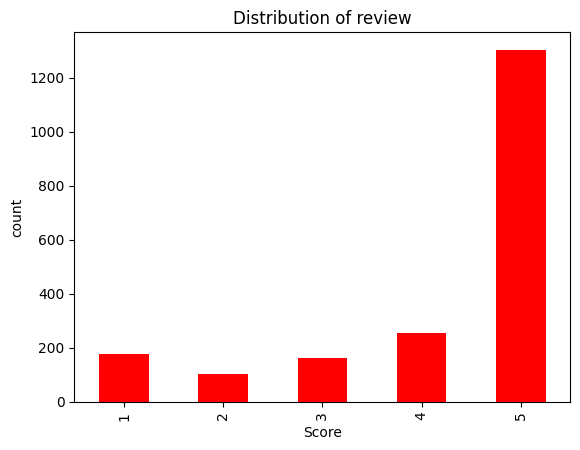

In [40]:
ax=df['Score'].value_counts().sort_index()
bar_color ="red"
ax.plot(kind="bar",color=bar_color)

plt.xlabel("Score")
plt.ylabel("count")

plt.title("Distribution of review")
plt.show()

In [41]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package punkt to C:\Users\NILANJAN
[nltk_data]     SARKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\NILANJAN SARKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to C:\Users\NILANJAN
[nltk_data]     SARKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [42]:
example = df ['Text'][1]
print(example)

Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".


In [43]:
token = nltk.word_tokenize(example)
print(token)

['Product', 'arrived', 'labeled', 'as', 'Jumbo', 'Salted', 'Peanuts', '...', 'the', 'peanuts', 'were', 'actually', 'small', 'sized', 'unsalted', '.', 'Not', 'sure', 'if', 'this', 'was', 'an', 'error', 'or', 'if', 'the', 'vendor', 'intended', 'to', 'represent', 'the', 'product', 'as', '``', 'Jumbo', "''", '.']


In [44]:
tagged = nltk.pos_tag(token)
print(tagged)

[('Product', 'NNP'), ('arrived', 'VBD'), ('labeled', 'VBN'), ('as', 'IN'), ('Jumbo', 'NNP'), ('Salted', 'NNP'), ('Peanuts', 'NNP'), ('...', ':'), ('the', 'DT'), ('peanuts', 'NNS'), ('were', 'VBD'), ('actually', 'RB'), ('small', 'JJ'), ('sized', 'VBN'), ('unsalted', 'JJ'), ('.', '.'), ('Not', 'RB'), ('sure', 'JJ'), ('if', 'IN'), ('this', 'DT'), ('was', 'VBD'), ('an', 'DT'), ('error', 'NN'), ('or', 'CC'), ('if', 'IN'), ('the', 'DT'), ('vendor', 'NN'), ('intended', 'VBN'), ('to', 'TO'), ('represent', 'VB'), ('the', 'DT'), ('product', 'NN'), ('as', 'IN'), ('``', '``'), ('Jumbo', 'NNP'), ("''", "''"), ('.', '.')]


In [45]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [46]:
sia.polarity_scores("i am so happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [47]:
sia.polarity_scores("you are fucking worst")

{'neg': 0.594, 'neu': 0.406, 'pos': 0.0, 'compound': -0.659}

In [48]:
res={}
for i , row in tqdm(df.iterrows(),total =len(df)):
  text=row['Text']
  myid=row['Id']
  res[myid] =sia.polarity_scores(text)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [49]:
vaders= pd.DataFrame(res).T
vaders= vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df,how='left')

In [50]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


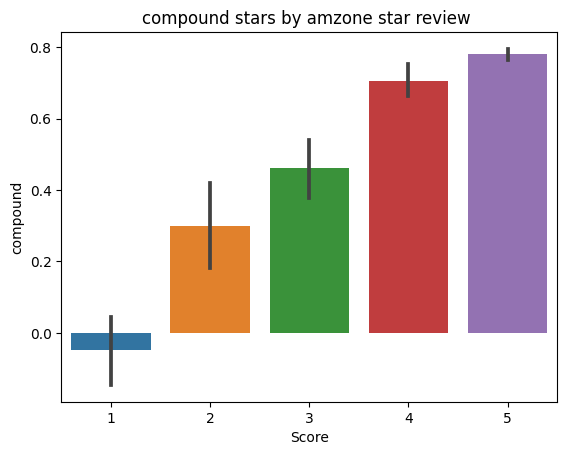

In [51]:
ax=sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title('compound stars by amzone star review ')
plt.show()

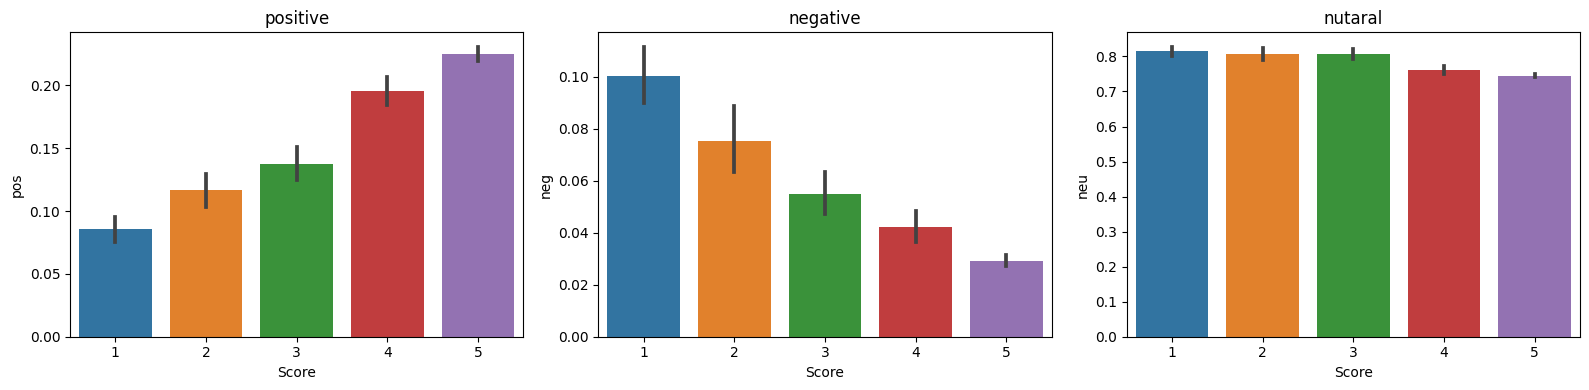

In [52]:
fig , axs =plt. subplots(1,3,figsize=(16,4))
sns.barplot(data=vaders,x='Score',y='pos', ax= axs[0])
sns.barplot(data=vaders,x='Score',y='neg', ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neu',ax= axs[2])
axs[0].set_title('positive')
axs[1].set_title('negative')
axs[2].set_title('nutaral')
plt.tight_layout()
plt.show()

In [53]:
%pip install transformers
from  transformers import AutoTokenizer
from  transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Note: you may need to restart the kernel to use updated packages.


In [54]:
import torch

In [55]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [56]:
print(example)
sia.polarity_scores(example)

Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".


{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}

In [57]:
encoded_text=tokenizer(example,return_tensors='pt')
output= model(**encoded_text)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores_dic={
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dic)

{'roberta_neg': 0.50898594, 'roberta_neu': 0.4524137, 'roberta_pos': 0.038600374}


In [58]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [59]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/2000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863
Broke for id 1053
Broke for id 1070
Broke for id 1156
Broke for id 1321
Broke for id 1375
Broke for id 1498
Broke for id 1575
Broke for id 1796
Broke for id 1826


In [60]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [61]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

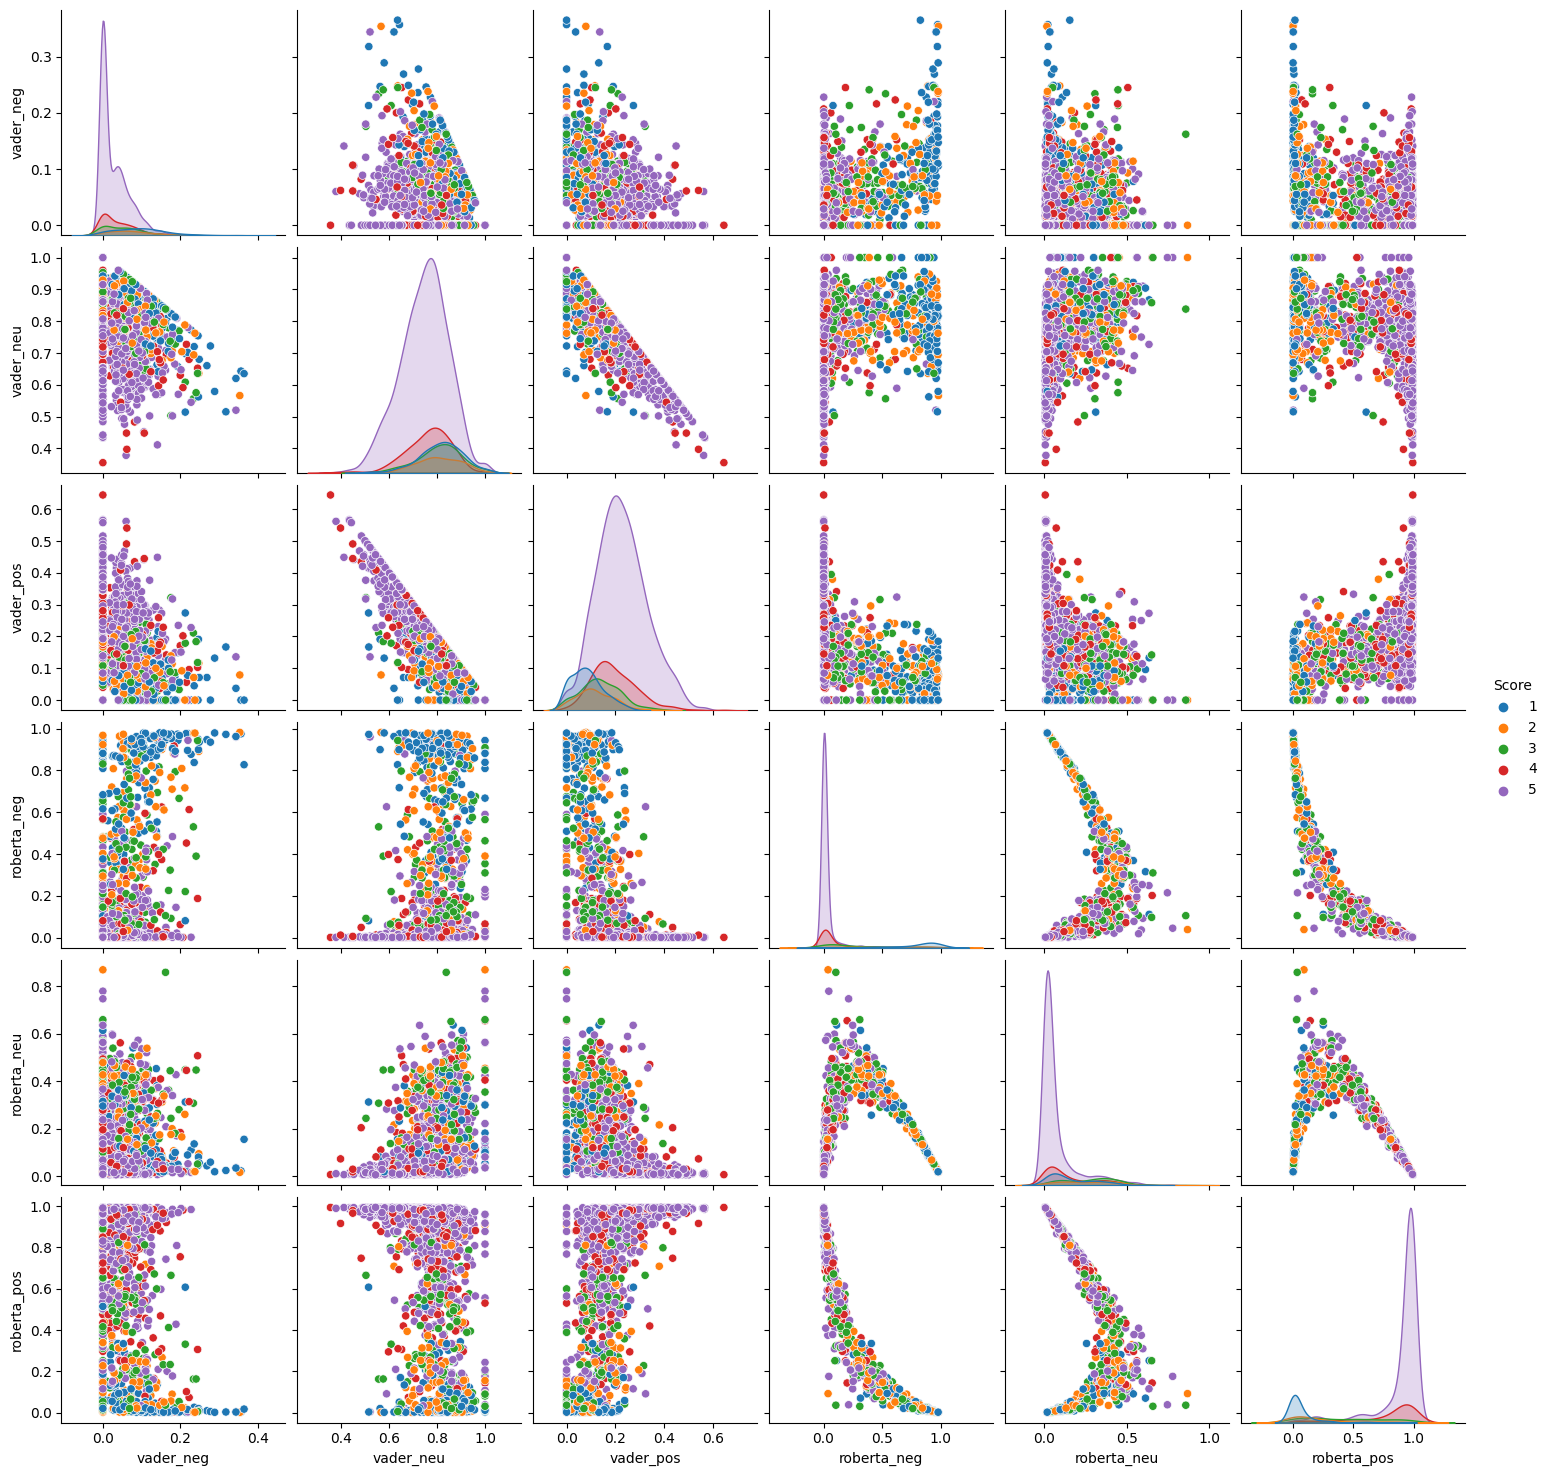

In [62]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [63]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]
    

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [64]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [65]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [66]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

c:\Users\NILANJAN SARKAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\NILANJAN SARKAR\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [67]:
sent_pipeline('I hate you')

[{'label': 'NEGATIVE', 'score': 0.9991129040718079}]